# Stragi for analyse
Prep the dataset for training

In [194]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [195]:
#Read the dataframe
df = pd.read_csv(".\stud-stat-anonymous.csv")

In [196]:
#Create a new dataframe, that store the prep data
d = {'student': [], 'team': [], 'absence': [],'isClass': []}
newdf= pd.DataFrame(data=d)

In [197]:
newdf

,student,team,absence,isClass


In [198]:
#insert multi rows pr student, so that's not spars that in the set
for index, row in df.iterrows():
    #row["Fag"]
    #newdf = newdf.append({'student':row['Id'],'Class':row['Klasse']}, ignore_index=True)
    newdf = newdf.append({'student':row['Id'],'team':row['Klasse'],'absence':row['Samlet fravær'],'isClass':True}, ignore_index=True)
    newdf = newdf.append({'student':row['Id'],'team':row['Fag'],'absence':row['Fravær'],'isClass':False}, ignore_index=True)
    newdf = newdf.append({'student':row['Id'],'team':row['Fag.1'],'absence':row['Fravær.1'],'isClass':False}, ignore_index=True)
    newdf = newdf.append({'student':row['Id'],'team':row['Fag.2'],'absence':row['Fravær.2'],'isClass':False}, ignore_index=True)
    newdf = newdf.append({'student':row['Id'],'team':row['Fag.3'],'absence':row['Fravær.3'],'isClass':False}, ignore_index=True)
                         


In [199]:
newdf

,student,team,absence,isClass
0,214366.0,Web and Soft Electives,100%,1.0
1,214366.0,Big Data,100%,0.0
2,214366.0,NaN,NaN,0.0
3,214366.0,NaN,NaN,0.0
4,214366.0,NaN,NaN,0.0
5,680092.0,Web and Soft Electives,100%,1.0
6,680092.0,Angular,100%,0.0
7,680092.0,Web Security,100%,0.0
8,680092.0,NaN,NaN,0.0
9,680092.0,NaN,NaN,0.0


In [200]:
#drop any spars data
newdf = newdf.dropna()

In [201]:
#convert the absence from a string to float and removing the % symbole

arr =newdf["absence"].values
tmp = []
for x in arr:
    x= float(x.replace('%', '')) 
    tmp.append(x)
    
newdf =newdf.drop(['absence'], axis=1)
newdf['absence'] = tmp


In [202]:

newdf['absence'].unique()


array([100.  ,  96.9 ,   0.  ,  90.9 ,  80.  ,  88.5 ,  72.22,  88.  ,
        79.31,  87.7 ,  85.71,  87.88,  86.2 ,  68.75,  63.64,  55.56,
        85.5 ,  50.  ,  84.6 ,  77.  ,  61.11,  87.5 ,  88.89,  72.4 ,
        68.42,  75.  ,  72.1 ,  81.82,  71.3 ,  71.2 ,  18.18,  70.1 ,
        66.67,  68.  ,  68.97,  67.8 ,  67.7 ,  57.58,  81.25,  72.73,
        66.7 ,  65.4 ,  73.68,  57.14,  63.6 ,  60.  ,  33.33,  59.8 ,
        44.44,  58.5 ,  92.86,  60.61,  31.25,  57.5 ,  55.2 ,  22.22,
        54.5 ,  16.67,  53.  ,  22.73,  71.43,  51.7 ,  71.05,  37.5 ,
        49.4 ,  37.04,  49.2 ,  55.26,  40.91,  48.8 ,  38.89,  48.6 ,
        28.57,  48.5 ,  48.3 ,  11.11,  47.7 ,  64.29,  18.75,  47.  ,
        36.11,  46.  ,  37.93,  53.7 ,  45.7 ,  81.58,  14.29,  45.5 ,
        44.6 ,  35.71,  41.38,  43.9 ,  53.33,  43.1 ,  42.42,  42.9 ,
        31.03,  42.86,  42.4 ,  30.  ,  52.78,  41.4 ,  78.95,  12.5 ,
        83.33,  25.  ,  40.9 ,  70.  ,  40.7 ,  23.68,  37.9 ,  36.9 ,
      

In [203]:
#remove all rows where the column absence is bigger then 75
#newdf = newdf[newdf["absence"] <= 75.0]
#create an team id, so if we want to do ML that takes a parameter team, we can use team id.
team_encode,team_id = newdf['team'].factorize()
newdf["team_id"] = team_encode
columnsTitles=["student","team","team_id","absence","isClass"]
newdf=newdf.reindex(columns=columnsTitles)

In [204]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 869 entries, 0 to 1118
Data columns (total 5 columns):
student    869 non-null float64
team       869 non-null object
team_id    869 non-null int64
absence    869 non-null float64
isClass    869 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 40.7+ KB


In [205]:
newdf.head()

,student,team,team_id,absence,isClass
0,214366.0,Web and Soft Electives,0,100.0,1.0
1,214366.0,Big Data,1,100.0,0.0
5,680092.0,Web and Soft Electives,0,100.0,1.0
6,680092.0,Angular,2,100.0,0.0
7,680092.0,Web Security,3,100.0,0.0


In [206]:
newdf

,student,team,team_id,absence,isClass
0,214366.0,Web and Soft Electives,0,100.0,1.0
1,214366.0,Big Data,1,100.0,0.0
5,680092.0,Web and Soft Electives,0,100.0,1.0
6,680092.0,Angular,2,100.0,0.0
7,680092.0,Web Security,3,100.0,0.0
10,906441.0,Web and Soft Electives,0,100.0,1.0
11,906441.0,Angular,2,100.0,0.0
12,906441.0,Web Security,3,100.0,0.0
15,432875.0,Web and Soft Electives,0,100.0,1.0
16,432875.0,Angular,2,100.0,0.0


In [207]:
newdf.head()

,student,team,team_id,absence,isClass
0,214366.0,Web and Soft Electives,0,100.0,1.0
1,214366.0,Big Data,1,100.0,0.0
5,680092.0,Web and Soft Electives,0,100.0,1.0
6,680092.0,Angular,2,100.0,0.0
7,680092.0,Web Security,3,100.0,0.0


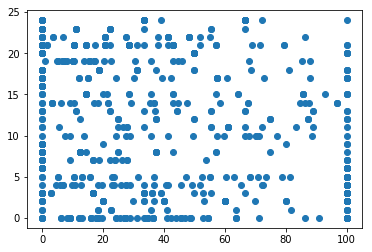

In [208]:
plt.scatter(newdf.absence,newdf.team_id)

In [231]:
is_class_df = newdf[newdf["isClass"] == 1]

In [232]:
team_df =newdf[newdf["isClass"] == 0]

In [233]:
#is_class_df = is_class_df[is_class_df['absence']==100.0]

In [236]:
is_class_df

,student,team_id,absence,isClass
0,214366.0,0,100.0,1.0
5,680092.0,0,100.0,1.0
10,906441.0,0,100.0,1.0
15,432875.0,0,100.0,1.0
20,146518.0,0,100.0,1.0
25,864755.0,0,100.0,1.0
30,464972.0,0,100.0,1.0
35,728877.0,0,100.0,1.0
40,419492.0,0,100.0,1.0
45,205702.0,0,100.0,1.0


In [243]:
#newdf 


In [238]:
combined = newdf.append(is_class_df)
combined[~combined.index.duplicated(keep=False)]

,student,team_id,absence,isClass
1,214366.0,1,100.0,0.0
6,680092.0,2,100.0,0.0
7,680092.0,3,100.0,0.0
11,906441.0,2,100.0,0.0
12,906441.0,3,100.0,0.0
16,432875.0,2,100.0,0.0
17,432875.0,3,100.0,0.0
21,146518.0,2,100.0,0.0
22,146518.0,3,100.0,0.0
26,864755.0,2,100.0,0.0


Web and Soft Electives


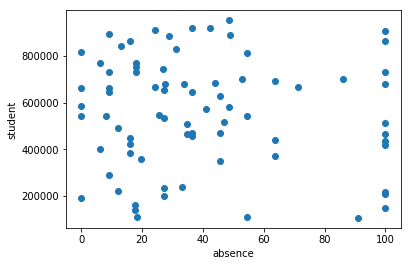

Big Data


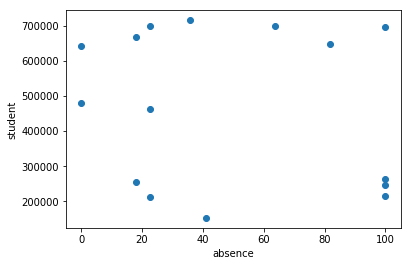

Angular


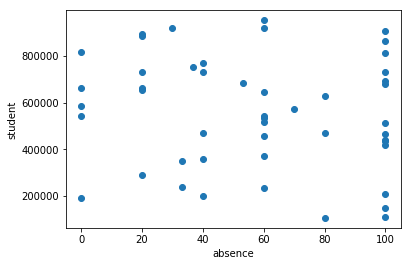

Web Security


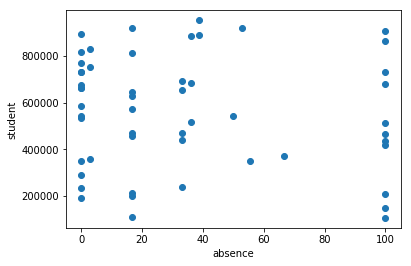

SD18i


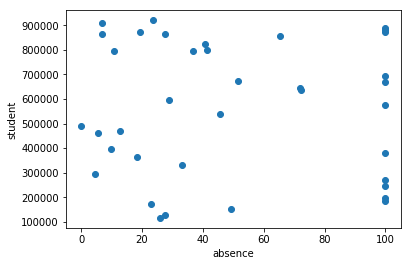

DLS


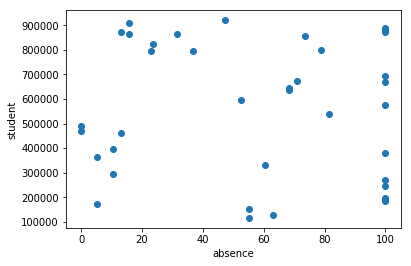

System Integration


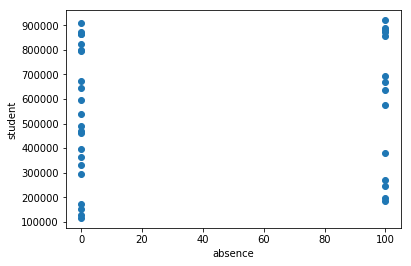

Software Design Patterns


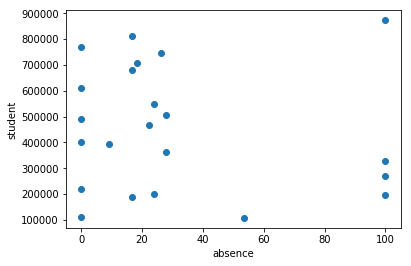

Data Science


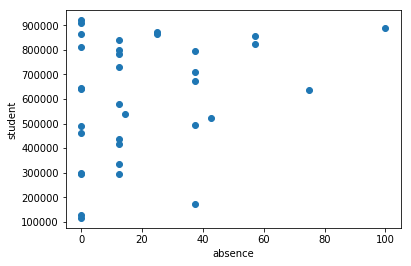

Quantum Computing


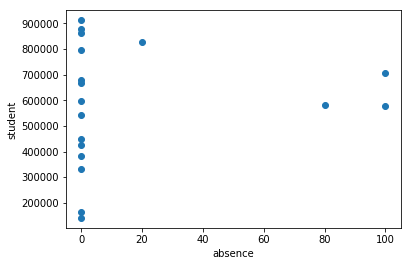

ITS19w1


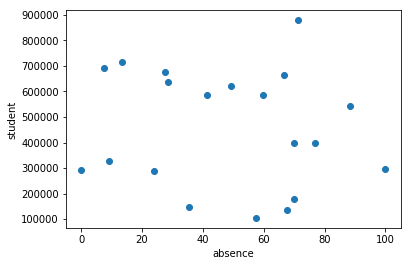

Intro til IT Sikkerhed


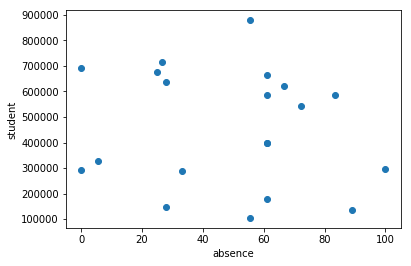

Net. and Com. security


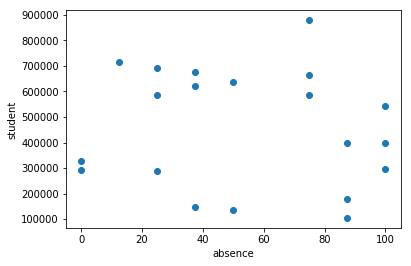

System Security


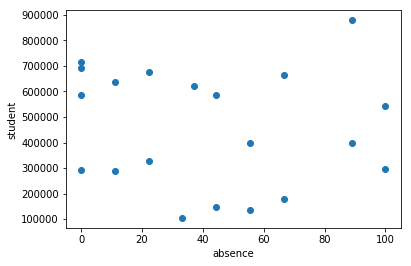

ITS18a


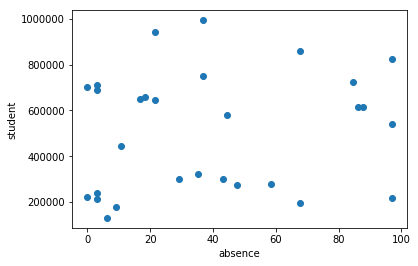

Security for mobile devices


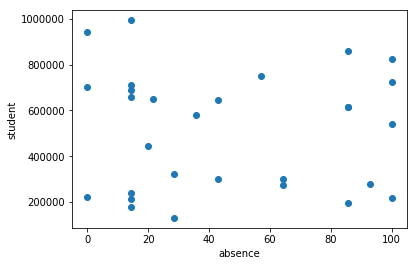

IT Governance 2


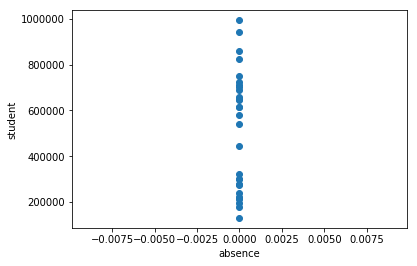

Security Engineering


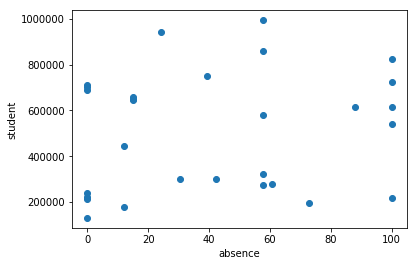

Reverse Eng. Malware


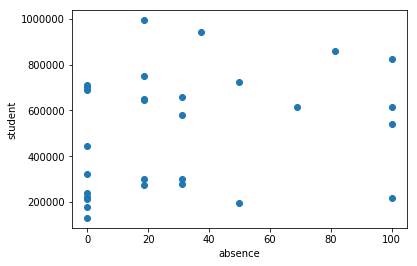

SD19w1


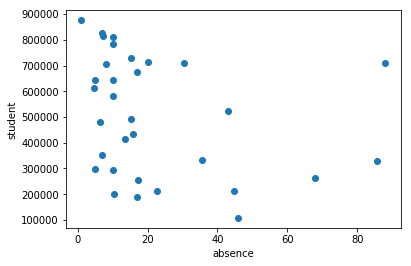

Databases


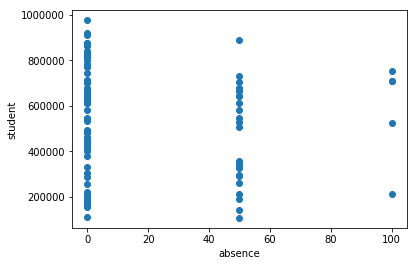

Test


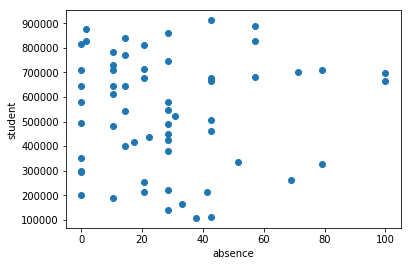

Web19w1


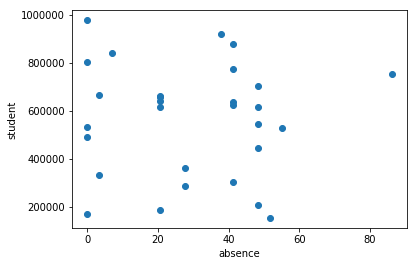

Web Development


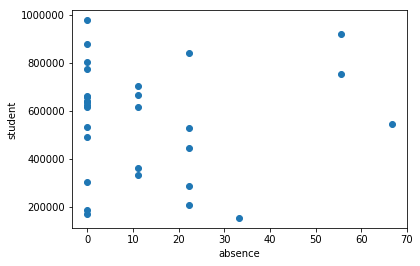

Interface Design


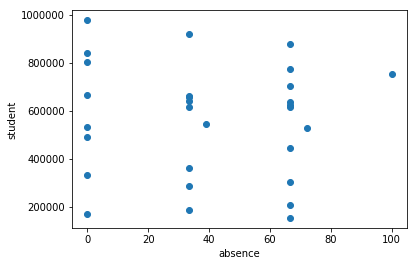

In [216]:
for x in range(len(newdf['team'].unique())):

    tmpdf=newdf[newdf["team_id"] == x]
    print(team_id[x])
    plt.scatter(tmpdf.absence,tmpdf.student)
    plt.xlabel('absence')
    plt.ylabel('student')
    plt.show()
    

Big Data


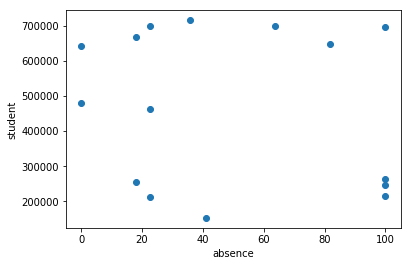

Angular


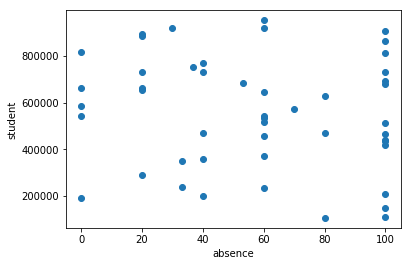

Web Security


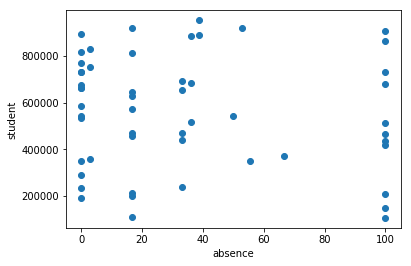

DLS


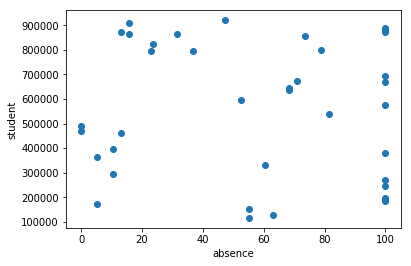

System Integration


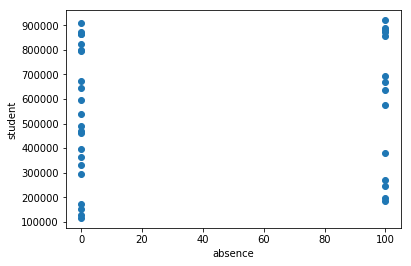

Software Design Patterns


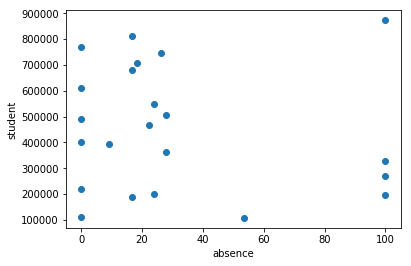

Data Science


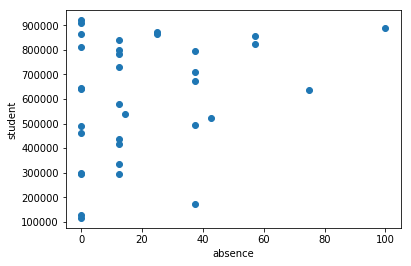

Quantum Computing


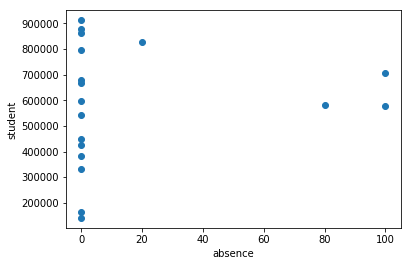

Intro til IT Sikkerhed


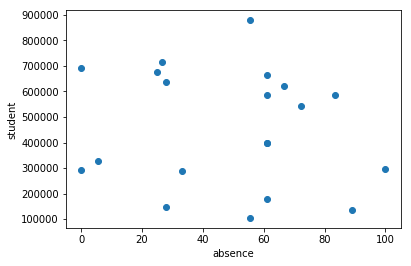

Net. and Com. security


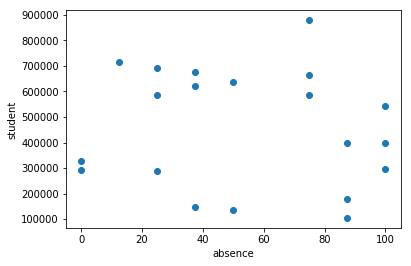

System Security


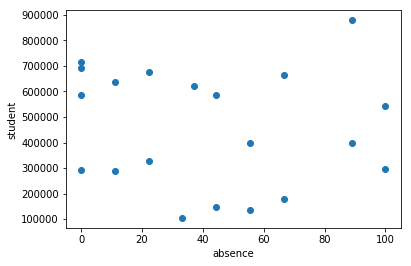

Security for mobile devices


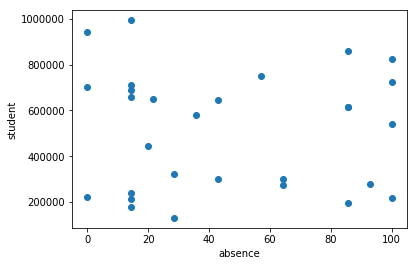

IT Governance 2


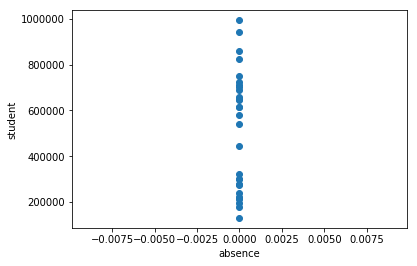

Security Engineering


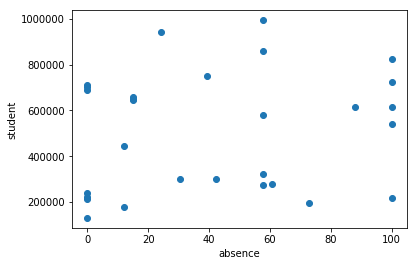

Reverse Eng. Malware


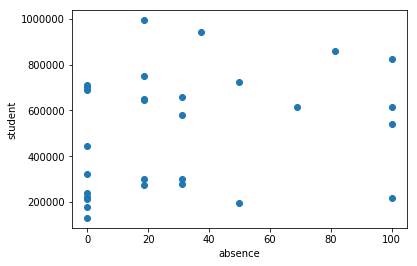

Databases


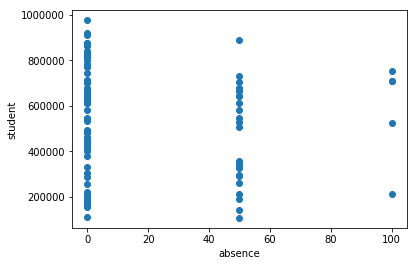

Test


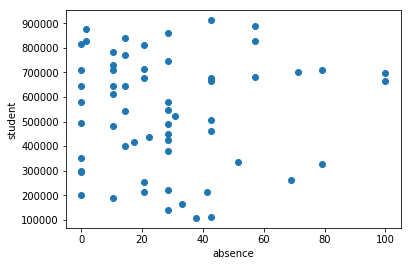

Web Development


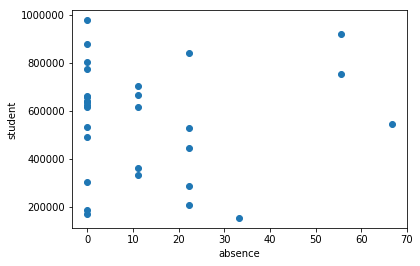

Interface Design


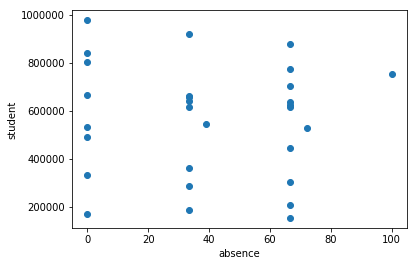

In [217]:
for x in team_df['team'].unique():

    tmpdf=team_df[team_df["team"] == x]
    print(x)
    plt.scatter(tmpdf.absence,tmpdf.student)
    plt.xlabel('absence')
    plt.ylabel('student')
    plt.show()
    

In [218]:
#Drop rows where team is == the following
newdf = newdf[newdf.team != 'IT Governance 2']
newdf =newdf[newdf.team != 'Databases']
newdf =newdf[newdf.team != 'System Integration']
newdf =newdf[newdf.team != 'Quantum Computing']
newdf =newdf.drop('team', axis=1)



In [219]:
newdf.head()

,student,team_id,absence,isClass
0,214366.0,0,100.0,1.0
1,214366.0,1,100.0,0.0
5,680092.0,0,100.0,1.0
6,680092.0,2,100.0,0.0
7,680092.0,3,100.0,0.0


In [220]:
#newdf.drop(['IT Governance 2', 'Databases','System Integration','Quantum Computing'])

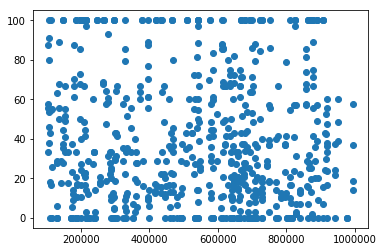

In [221]:
plt.scatter(newdf['student'],newdf['absence'])


In [222]:
newdf.head()

,student,team_id,absence,isClass
0,214366.0,0,100.0,1.0
1,214366.0,1,100.0,0.0
5,680092.0,0,100.0,1.0
6,680092.0,2,100.0,0.0
7,680092.0,3,100.0,0.0


In [223]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(newdf)
y_kmeans = kmeans.predict(newdf)

Text(0, 0.5, 'absence')

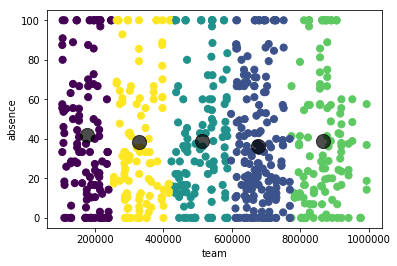

In [224]:
from sklearn.cluster import KMeans
plt.scatter(newdf.iloc[:, 0], newdf.iloc[:, 2], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 2], c='black', s=200, alpha=0.7);
plt.xlabel('team')
plt.ylabel('absence')

In [225]:
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.cluster import KMeans
X= newdf
# k means determine k
distortions = []
scores = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k).fit(X)
    model.fit(X)
    distortions.append(sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 
    # calculate silhouette score for each number of clusters
    score = metrics.silhouette_score(X, model.labels_, metric='euclidean', sample_size=len(X))
    print("\nNumber of clusters =", k)
    print("Silhouette score =", score)
    scores.append(score)


Number of clusters = 2
Silhouette score = 0.6467428552624972

Number of clusters = 3
Silhouette score = 0.5937199950377484

Number of clusters = 4
Silhouette score = 0.616999292573226

Number of clusters = 5
Silhouette score = 0.6068500637994196

Number of clusters = 6
Silhouette score = 0.5879780898158377

Number of clusters = 7
Silhouette score = 0.5711190412348316

Number of clusters = 8
Silhouette score = 0.5752761657622307

Number of clusters = 9
Silhouette score = 0.5652052140643569


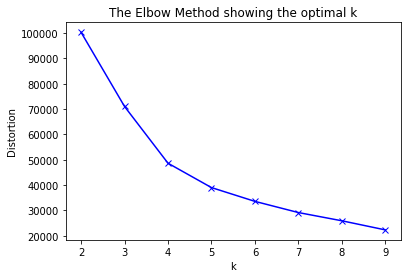

In [226]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [227]:
def pca(X, k):
    assert(type(X) == np.ndarray)
    assert(type(k) == int)
    # m: number of samples, n: number of features
    m, n = X.shape
    Sigma = (1/float(m)) * (X.T.dot(X))
    U, S, V = np.linalg.svd(Sigma)
    U = U[:, 0:k]
    Z = X.dot(U)
    return Z

In [228]:
pca(X.values,5)

array([[-2.14366006e+05, -8.71643235e+01, -5.62745454e+00,
         7.56273987e-01],
       [-2.14366006e+05, -8.71857305e+01, -4.62656218e+00,
        -2.42603493e-01],
       [-6.80092005e+05, -5.93318145e+01, -1.28778587e+01,
         5.55119471e-01],
       ...,
       [-5.32263999e+05,  3.13038076e+01,  1.37068006e+01,
         7.94761384e-01],
       [-5.32263999e+05,  3.12824006e+01,  1.47076929e+01,
        -2.04116096e-01],
       [-5.32263999e+05,  3.12595084e+01,  1.57074303e+01,
        -2.02995346e-01]])